<a href="https://colab.research.google.com/github/lukasberglund/thumbs_up/blob/main/EaselTrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install huggingface wandb huggingface_hub accelerate 

In [2]:
from getpass import getpass
from datetime import datetime


In [3]:
hf_token = getpass('Enter huggingface token:')
from huggingface_hub import login
login(hf_token)

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [4]:
import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: berglund. Use `wandb login --relogin` to force relogin


True

In [5]:
train_image_dir = "images/train"
validation_image_dir = "images/validation"

validation_images = ['brad-pitt-thumbs-up.webp',
 'obama-thumbs-up.webp',
 'pexels-ketut-subiyanto-4909522.jpg']

marker = '<thumbs_up>'

validation_prompts = [f'a photo of Brad Pitt in a suit and sunglasses showing {marker} thumbs up', f'a photo of Barack Obama wearing a vest showing {marker} thumbs up', f'a photo of a black man at the beach showing {marker} thumbs up']

In [8]:
import subprocess
import sys

formatted_datetime = datetime.now().strftime("%Y-%m-%d_%H:%M:%S")

# Define parameters in a dictionary
params = {
    'pretrained_model_name_or_path': 'stabilityai/stable-diffusion-xl-base-1.0',
    'instance_data_dir': 'images/train',
    'pretrained_vae_model_name_or_path': 'madebyollin/sdxl-vae-fp16-fix',
    'output_dir': f'thumbs_up_lora_{formatted_datetime}',
    'mixed_precision': 'fp16',
    'instance_prompt': 'a photo of a person showing thumbs up',
    'resolution': '1024',
    'train_batch_size': '1',
    'gradient_accumulation_steps': '4',
    'learning_rate': '1e-5',
    'report_to': 'wandb',
    'lr_scheduler': 'constant',
    'lr_warmup_steps': '0',
    'max_train_steps': '500',
    'validation_prompt': 'A photo of Brad Pitt showing thumbs up',
    'validation_epochs': '25',
    'seed': '0',
    'push_to_hub': True,
    'center_crop': True,
    'validation_prompts': validation_prompts,
    'validation_image_dir': validation_image_dir,
    'validation_images': validation_images,

}

# Initialize the command list
cmd = ['accelerate', 'launch', '/content/diffusers/examples/dreambooth/train_dreambooth_lora_sdxl.py']

# Add parameters to the command list
for key, value in params.items():
    cmd.append(f'--{key}')
    if value is not None:
        if isinstance(value, list):
            cmd.extend(value)
        elif isinstance(value, bool):  # Convert boolean to string
            cmd.append(str(value).lower())
        else:
            cmd.append(value)

# Run the command and capture the output
process = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True, bufsize=1)

# Stream stdout
for line in iter(process.stdout.readline, ''):
    print(line.strip())

# Stream stderr
for line in iter(process.stderr.readline, ''):
    print(line.strip(), file=sys.stderr)

# Wait for the process to complete
process.stdout.close()
process.stderr.close()
process.wait()


The following values were not passed to `accelerate launch` and had defaults used instead:
`--num_processes` was set to a value of `1`
`--num_machines` was set to a value of `1`
`--mixed_precision` was set to a value of `'no'`
`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
/usr/bin/python: can't open file '/content/diffusers/examples/dreambooth/train_dreambooth_lora_sdxl.py': [Errno 2] No such file or directory
Traceback (most recent call last):
File "/usr/local/bin/accelerate", line 8, in <module>
sys.exit(main())
File "/usr/local/lib/python3.10/dist-packages/accelerate/commands/accelerate_cli.py", line 47, in main
args.func(args)
File "/usr/local/lib/python3.10/dist-packages/accelerate/commands/launch.py", line 986, in launch_command
simple_launcher(args)
File "/usr/local/lib/python3.10/dist-packages/accelerate/commands/launch.py", line 628, in simple_launcher
raise subprocess.Cal

1

In [1]:
#@title Install the required libs
!pip install -U -qq git+https://github.com/huggingface/diffusers.git
!pip install -qq accelerate transformers ftfy
!pip install accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 79.0 MB/s eta 0:00:00


In [2]:
#@title [Optional] Install xformers for faster and memory efficient training
#@markdown Acknowledgement: The xformers wheel are taken from [TheLastBen/fast-stable-diffusion](https://github.com/TheLastBen/fast-stable-diffusion). Thanks a lot for building these wheels!
%%time

!pip install -U --pre triton

from subprocess import getoutput
from IPython.display import HTML
from IPython.display import clear_output
import time

s = getoutput('nvidia-smi')
if 'T4' in s:
  gpu = 'T4'
elif 'P100' in s:
  gpu = 'P100'
elif 'V100' in s:
  gpu = 'V100'
elif 'A100' in s:
  gpu = 'A100'

while True:
    try:
        gpu=='T4'or gpu=='P100'or gpu=='V100'or gpu=='A100'
        break
    except:
        pass
    print('[1;31mit seems that your GPU is not supported at the moment')
    time.sleep(5)

if (gpu=='T4'):
  %pip install -q https://github.com/TheLastBen/fast-stable-diffusion/raw/main/precompiled/T4/xformers-0.0.13.dev0-py3-none-any.whl

elif (gpu=='P100'):
  %pip install -q https://github.com/TheLastBen/fast-stable-diffusion/raw/main/precompiled/P100/xformers-0.0.13.dev0-py3-none-any.whl

elif (gpu=='V100'):
  %pip install -q https://github.com/TheLastBen/fast-stable-diffusion/raw/main/precompiled/V100/xformers-0.0.13.dev0-py3-none-any.whl

elif (gpu=='A100'):
  %pip install -q https://github.com/TheLastBen/fast-stable-diffusion/raw/main/precompiled/A100/xformers-0.0.13.dev0-py3-none-any.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.0.0
    Uninstalling triton-2.0.0:
      Successfully uninstalled triton-2.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.0.1+cu118 requires triton==2.0.0; platform_system == "Linux" and platform_machine == "x86_64", but you have triton 2.1.0 which is incompatible.
  ERROR: HTTP error 404 while getting https://github.com/TheLastBen/fast-stable-diffusion/raw/main/precompiled/V100/xformers-0.0.13.dev0-py3-none-any.whl
ERROR: Could not install requirement xformers==0.0.13.dev0 from https://github.com/TheLastBen/fast-stable-diffusion/raw/main/precompiled/V100/xformers-0.0.13.dev0-py3-none-any.whl because of HTTP error 404 Client Error: Not Found for url: https://github.com/TheLastBen/fast-stable-diffu

In [ ]:
#@title [Optional] Login to the Hugging Face Hub
#@markdown Add a token with the "Write Access" role to be able to add your trained concept to the [Library of Concepts](https://huggingface.co/sd-concepts-library)
from huggingface_hub import notebook_login

notebook_login()

In [78]:
#@title Import required libraries
import argparse
import itertools
import math
import os
import random
from datetime import datetime


import numpy as np
import torch
import torch.nn.functional as F
import torch.utils.checkpoint
from torch.utils.data import Dataset

import PIL
import accelerate
from accelerate import Accelerator
from accelerate.logging import get_logger
from accelerate.utils import set_seed
from diffusers import AutoencoderKL, DDPMScheduler, PNDMScheduler, StableDiffusionPipeline, UNet2DConditionModel, StableDiffusionXLPipeline
from diffusers.optimization import get_scheduler
from diffusers.pipelines.stable_diffusion import StableDiffusionSafetyChecker
from PIL import Image
from torchvision import transforms
from tqdm.auto import tqdm
from transformers import CLIPFeatureExtractor, CLIPTextModel, CLIPTokenizer

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

image_size = 1024

In [4]:
#@markdown `pretrained_model_name_or_path` which Stable Diffusion checkpoint you want to use
pretrained_model_name_or_path = "stabilityai/stable-diffusion-xl-base-1.0" #@param ["stabilityai/stable-diffusion-2", "stabilityai/stable-diffusion-2-base", "CompVis/stable-diffusion-v1-4", "runwayml/stable-diffusion-v1-5", "stabilityai/stable-diffusion-xl-base-1.0"] {allow-input: true}

In [5]:

from google.colab import drive
drive.mount('/content/gdrive')
save_path = '/content/gdrive/MyDrive/thumbs up'

Mounted at /content/gdrive


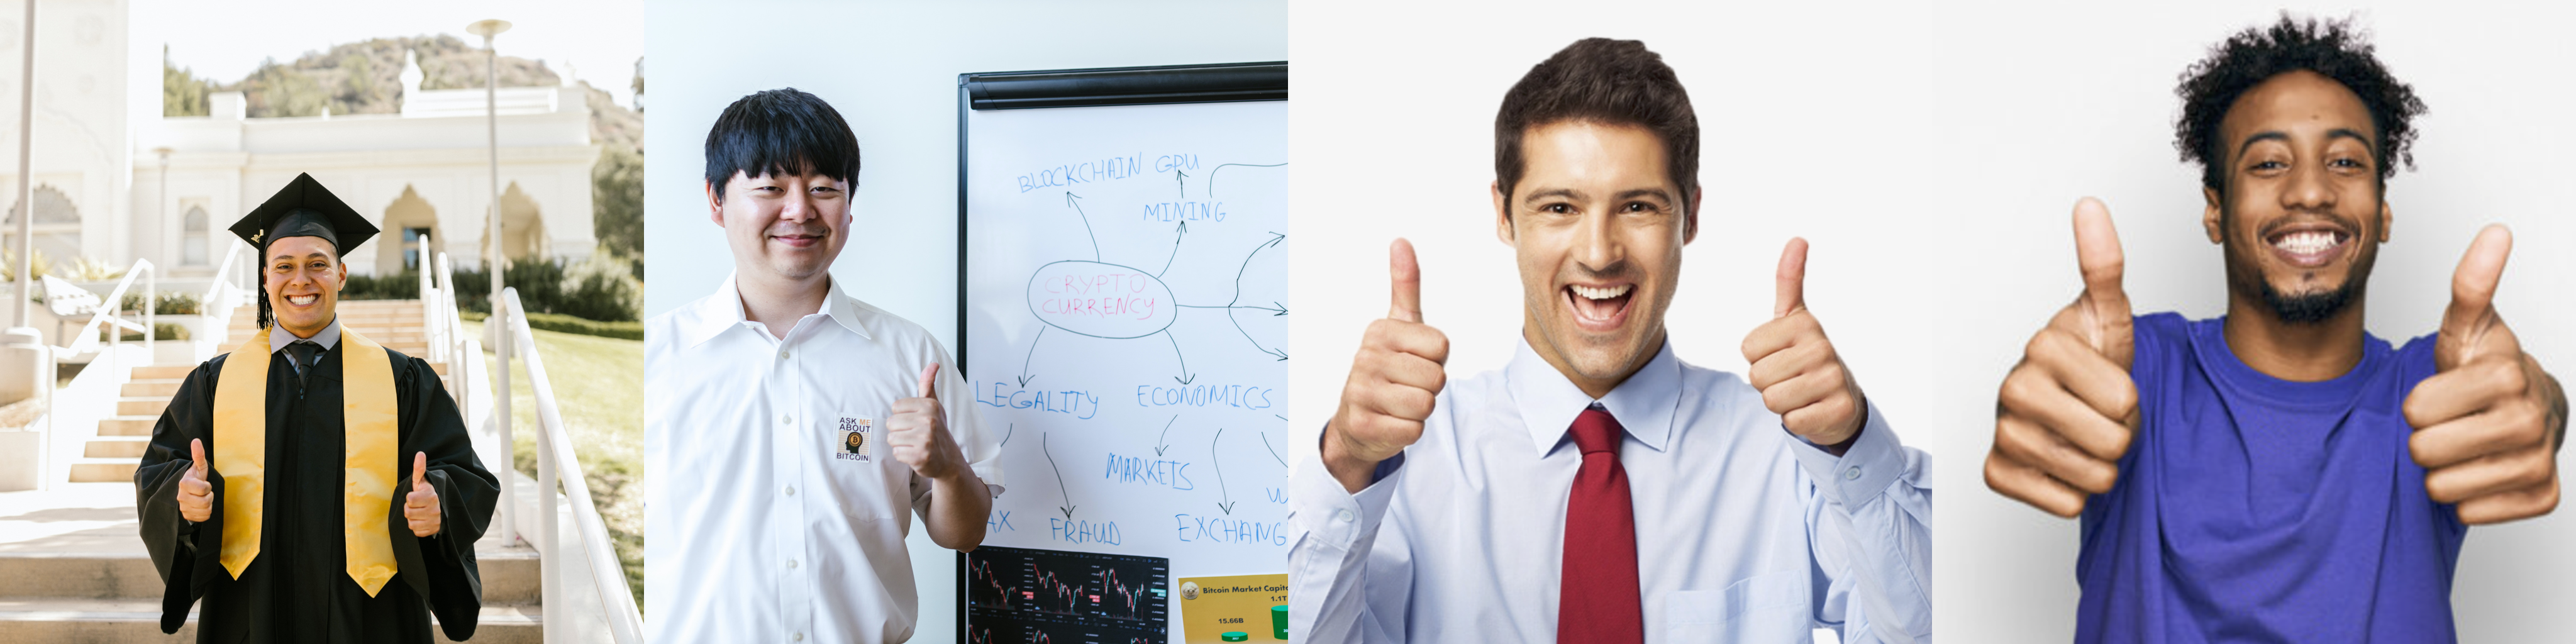

In [6]:
images = []
image_filenames = ["pexels-rdne-stock-project-7713137.jpg", "pexels-rdne-stock-project-8370336.jpg", "thumbsUp7.png", "thumbsUp10.png", "anil-sharma-1MBokFZpczo-unsplash.jpg"][:4]

def crop_square(img: Image, size: int) -> Image:
  width, height = img.size
  center_x, center_y = width // 2, height // 2
  side_length = min(width, height)
  start_x = center_x - (side_length // 2)
  start_y = center_y - (side_length // 2)

  return img.crop((start_x, start_y, start_x + side_length, start_y + side_length)).resize((size, size))



for file_path in [os.path.join(save_path, filename) for filename in image_filenames]:
    images.append(crop_square(Image.open(file_path), image_size))

image_grid(images, 1, len(images))

In [7]:
#@title Settings for your newly created concept
#@markdown `what_to_teach`: what is it that you are teaching? `object` enables you to teach the model a new object to be used, `style` allows you to teach the model a new style one can use.
what_to_teach = "gesture" #@param ["object", "style", "gesture"]
#@markdown `placeholder_token` is the token you are going to use to represent your new concept (so when you prompt the model, you will say "A `<my-placeholder-token>` in an amusement park"). We use angle brackets to differentiate a token from other words/tokens, to avoid collision.
placeholder_token = "thumbs_up" #@param {type:"string"}
#@markdown `initializer_token` is a word that can summarise what your new concept is, to be used as a starting point
initializer_token = "gesture" #@param {type:"string"}

In [8]:
#@title Setup the prompt templates for training
# TODO change these to work better for my example
imagenet_templates_small = [
    "a photo of a {}",
    "a rendering of a {}",
    "a cropped photo of the {}",
    "the photo of a {}",
    "a photo of a clean {}",
    "a photo of a dirty {}",
    "a dark photo of the {}",
    "a photo of my {}",
    "a photo of the cool {}",
    "a close-up photo of a {}",
    "a bright photo of the {}",
    "a cropped photo of a {}",
    "a photo of the {}",
    "a good photo of the {}",
    "a photo of one {}",
    "a close-up photo of the {}",
    "a rendition of the {}",
    "a photo of the clean {}",
    "a rendition of a {}",
    "a photo of a nice {}",
    "a good photo of a {}",
    "a photo of the nice {}",
    "a photo of the small {}",
    "a photo of the weird {}",
    "a photo of the large {}",
    "a photo of a cool {}",
    "a photo of a small {}",
]

imagenet_style_templates_small = [
    "a painting in the style of {}",
    "a rendering in the style of {}",
    "a cropped painting in the style of {}",
    "the painting in the style of {}",
    "a clean painting in the style of {}",
    "a dirty painting in the style of {}",
    "a dark painting in the style of {}",
    "a picture in the style of {}",
    "a cool painting in the style of {}",
    "a close-up painting in the style of {}",
    "a bright painting in the style of {}",
    "a cropped painting in the style of {}",
    "a good painting in the style of {}",
    "a close-up painting in the style of {}",
    "a rendition in the style of {}",
    "a nice painting in the style of {}",
    "a small painting in the style of {}",
    "a weird painting in the style of {}",
    "a large painting in the style of {}",
]

person_descriptors = [
    "woman {}",
    "man {}",
    "person {}",
]

gesture_templates = person_descriptors

In [38]:
#@title Setup the dataset
# TODO what are these hyperparameters?
class TextualInversionDataset(Dataset):
    def __init__(
        self,
        data_root,
        tokenizer,
        learnable_property="object",  # [object, style]
        size=512,
        repeats=100,
        interpolation="bicubic",
        flip_p=0.5,
        set="train",
        placeholder_token="*",
        center_crop=False,
    ):

        self.data_root = data_root
        self.tokenizer = tokenizer
        self.learnable_property = learnable_property
        self.size = size
        self.placeholder_token = placeholder_token
        self.center_crop = center_crop
        self.flip_p = flip_p

        self.image_paths = [os.path.join(self.data_root, file_path) for file_path in os.listdir(self.data_root)]

        self.num_images = len(self.image_paths)
        self._length = self.num_images

        if set == "train":
            self._length = self.num_images * repeats

        self.interpolation = {
            "linear": PIL.Image.LINEAR,
            "bilinear": PIL.Image.BILINEAR,
            "bicubic": PIL.Image.BICUBIC,
            "lanczos": PIL.Image.LANCZOS,
        }[interpolation]

        if learnable_property == "style":
          self.templates = imagenet_style_templates_small
        elif learnable_property == "gesture":
          self.templates = gesture_templates
        else:
          self.templates = imagenet_templates_small

        self.flip_transform = transforms.RandomHorizontalFlip(p=self.flip_p)

    def __len__(self):
        return self._length

    def __getitem__(self, i):
        example = {}
        image = Image.open(self.image_paths[i % self.num_images])

        if not image.mode == "RGB":
            image = image.convert("RGB")

        placeholder_string = self.placeholder_token
        text = random.choice(self.templates).format(placeholder_string)

        example["input_ids"] = self.tokenizer(
            text,
            padding="max_length",
            truncation=True,
            max_length=self.tokenizer.model_max_length, # change that I don't understand
            return_tensors="pt",
        ).input_ids[0]

        # default to score-sde preprocessing
        img = np.array(image).astype(np.uint8)

        if self.center_crop:
            crop = min(img.shape[0], img.shape[1])
            h, w, = (
                img.shape[0],
                img.shape[1],
            )
            img = img[(h - crop) // 2 : (h + crop) // 2, (w - crop) // 2 : (w + crop) // 2]

        image = Image.fromarray(img)
        image = image.resize((self.size, self.size), resample=self.interpolation)

        image = self.flip_transform(image)
        image = np.array(image).astype(np.uint8)
        image = (image / 127.5 - 1.0).astype(np.float32)

        example["pixel_values"] = torch.from_numpy(image).permute(2, 0, 1)
        return example

In [41]:
#@title Load the tokenizer and add the placeholder token as a additional special token.
tokenizer = CLIPTokenizer.from_pretrained(
    pretrained_model_name_or_path,
    # "runwayml/stable-diffusion-v1-5",
    subfolder="tokenizer",
)

# Add the placeholder token in tokenizer
num_added_tokens = tokenizer.add_tokens(placeholder_token)
if num_added_tokens == 0:
    raise ValueError(
        f"The tokenizer already contains the token {placeholder_token}. Please pass a different"
        " `placeholder_token` that is not already in the tokenizer."
    )

In [42]:
#@title Get token ids for our placeholder and initializer token. This code block will complain if initializer string is not a single token
# Convert the initializer_token, placeholder_token to ids
token_ids = tokenizer.encode(initializer_token, add_special_tokens=False)
# Check if initializer_token is a single token or a sequence of tokens
if len(token_ids) > 1:
    raise ValueError("The initializer token must be a single token.")

initializer_token_id = token_ids[0]
placeholder_token_id = tokenizer.convert_tokens_to_ids(placeholder_token)


In [79]:
#@title Load the Diffusion model
# Load models and create wrapper for stable diffusion
pipeline = StableDiffusionXLPipeline.from_pretrained(pretrained_model_name_or_path)
# del pipeline


# text_encoder = CLIPTextModel.from_pretrained(
#     pretrained_model_name_or_path, subfolder="text_encoder"
# )
text_encoder = pipeline.text_encoder
vae = pipeline.vae
unet = pipeline.unet

# vae = AutoencoderKL.from_pretrained(
#     pretrained_model_name_or_path, subfolder="vae"
# )
# unet = UNet2DConditionModel.from_pretrained(
#     pretrained_model_name_or_path, subfolder="unet"
# )

# resize tokenizer to make space for the new embedding
text_encoder.resize_token_embeddings(len(tokenizer))

# Initialise the newly added placeholder token with the embeddings of
token_embeds = text_encoder.get_input_embeddings().weight.data
token_embeds[placeholder_token_id] = token_embeds[initializer_token_id]

# Freeze all parameters except newly added embedding vector
def freeze_params(params):
    for param in params:
        param.requires_grad = False

# Freeze vae and unet
freeze_params(vae.parameters())
freeze_params(unet.parameters())
# Freeze all parameters except for the token embeddings in text encoder
params_to_freeze = itertools.chain(
    text_encoder.text_model.encoder.parameters(),
    text_encoder.text_model.final_layer_norm.parameters(),
    text_encoder.text_model.embeddings.position_embedding.parameters(),
)
freeze_params(params_to_freeze)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [70]:
pipeline.unet

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): LoRACompatibleLinear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): LoRACompatibleLinear(in_features=1280, out_features=1280, bias=True)
  )
  (add_time_proj): Timesteps()
  (add_embedding): TimestepEmbedding(
    (linear_1): LoRACompatibleLinear(in_features=2816, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): LoRACompatibleLinear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 320, eps=1e-05, affine=True)
          (conv1): LoRACompatibleConv(320, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): LoRACompatibleLinear(in_features=1280, out_features=320, bias=True)
          (

In [80]:
#@title Create Dataset and Dataloader

train_dataset = TextualInversionDataset(
      data_root=save_path,
      tokenizer=tokenizer,
      size=vae.sample_size,
      placeholder_token=placeholder_token,
      repeats=100,
      learnable_property=what_to_teach, #Option selected above between object and style
      center_crop=False,
      set="train",
)

def create_dataloader(train_batch_size=1):
    return torch.utils.data.DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)

# create noise scheduler for training
noise_scheduler = DDPMScheduler.from_config(pretrained_model_name_or_path, subfolder="scheduler")

<ipython-input-80-1d51071553be>:6: FutureWarning: Accessing config attribute `sample_size` directly via 'AutoencoderKL' object attribute is deprecated. Please access 'sample_size' over 'AutoencoderKL's config object instead, e.g. 'unet.config.sample_size'.
  size=vae.sample_size,
<ipython-input-38-353d7d4799d8>:35: DeprecationWarning: LINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use BILINEAR or Resampling.BILINEAR instead.
  "linear": PIL.Image.LINEAR,
/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:239: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddpm.DDPMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


In [81]:
#@title Setting up all training args
# Note: Tutorial says you can tune learning_rate and max_train_steps
hyperparameters = {
    "learning_rate": 5e-04,
    "scale_lr": True,
    "max_train_steps": 100, # originally 2000
    "save_steps": 250,
    "train_batch_size": 4,
    "gradient_accumulation_steps": 1,
    "gradient_checkpointing": True,
    "mixed_precision": "fp16",
    "seed": 42,
    "output_dir": "learned_concepts"
}
!mkdir -p learned_concepts

In [90]:
#@title Training function
logger = get_logger(__name__)

def save_progress(text_encoder, placeholder_token_id, accelerator, save_path):
    logger.info("Saving embeddings")
    learned_embeds = accelerator.unwrap_model(text_encoder).get_input_embeddings().weight[placeholder_token_id]
    learned_embeds_dict = {placeholder_token: learned_embeds.detach().cpu()}
    torch.save(learned_embeds_dict, save_path)

def training_function(pipeline, text_encoder, vae, unet, output_dir):
    train_batch_size = hyperparameters["train_batch_size"]
    gradient_accumulation_steps = hyperparameters["gradient_accumulation_steps"]
    learning_rate = hyperparameters["learning_rate"]
    max_train_steps = hyperparameters["max_train_steps"]
    gradient_checkpointing = hyperparameters["gradient_checkpointing"]

    accelerator = Accelerator(
        gradient_accumulation_steps=gradient_accumulation_steps,
        mixed_precision=hyperparameters["mixed_precision"]
    )

    if gradient_checkpointing:
        text_encoder.gradient_checkpointing_enable()
        unet.enable_gradient_checkpointing()

    train_dataloader = create_dataloader(train_batch_size)

    if hyperparameters["scale_lr"]:
        learning_rate = (
            learning_rate * gradient_accumulation_steps * train_batch_size * accelerator.num_processes
        )

    # Initialize the optimizer
    optimizer = torch.optim.AdamW(
        text_encoder.get_input_embeddings().parameters(),  # only optimize the embeddings
        lr=learning_rate,
    )

    text_encoder, optimizer, train_dataloader = accelerator.prepare(
        text_encoder, optimizer, train_dataloader
    )

    weight_dtype = torch.float32
    if accelerator.mixed_precision == "fp16":
        weight_dtype = torch.float16
    elif accelerator.mixed_precision == "bf16":
        weight_dtype = torch.bfloat16

    # Move vae and unet to device
    vae.to(accelerator.device, dtype=weight_dtype)
    unet.to(accelerator.device, dtype=weight_dtype)

    # Keep vae in eval mode as we don't train it
    vae.eval()
    # Keep unet in train mode to enable gradient checkpointing
    unet.train()


    # We need to recalculate our total training steps as the size of the training dataloader may have changed.
    num_update_steps_per_epoch = math.ceil(len(train_dataloader) / gradient_accumulation_steps)
    num_train_epochs = math.ceil(max_train_steps / num_update_steps_per_epoch)

    # Train!
    total_batch_size = train_batch_size * accelerator.num_processes * gradient_accumulation_steps

    logger.info("***** Running training *****")
    logger.info(f"  Num examples = {len(train_dataset)}")
    logger.info(f"  Instantaneous batch size per device = {train_batch_size}")
    logger.info(f"  Total train batch size (w. parallel, distributed & accumulation) = {total_batch_size}")
    logger.info(f"  Gradient Accumulation steps = {gradient_accumulation_steps}")
    logger.info(f"  Total optimization steps = {max_train_steps}")
    # Only show the progress bar once on each machine.
    progress_bar = tqdm(range(max_train_steps), disable=not accelerator.is_local_main_process)
    progress_bar.set_description("Steps")
    global_step = 0

    for epoch in range(num_train_epochs):
        text_encoder.train()
        for step, batch in enumerate(train_dataloader):
            with accelerator.accumulate(text_encoder):
                # Convert images to latent space
                latents = vae.encode(batch["pixel_values"].to(dtype=weight_dtype)).latent_dist.sample().detach()
                latents = latents * 0.18215

                # Sample noise that we'll add to the latents
                noise = torch.randn_like(latents)
                bsz = latents.shape[0]
                # Sample a random timestep for each image
                timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bsz,), device=latents.device).long()

                # Add noise to the latents according to the noise magnitude at each timestep
                # (this is the forward diffusion process)
                noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

                # Get the text embedding for conditioning
                encoder_hidden_states = text_encoder(batch["input_ids"])[0]

                time_ids= pipeline._get_add_time_ids((1024, 1024), (0, 0), (1024, 1024), dtype=weight_dtype).to(latents.device)
                print(f"{time_ids.shape=}")
                # Predict the noise residual
                noise_pred = unet(noisy_latents, timesteps, encoder_hidden_states.to(weight_dtype), added_cond_kwargs={"text_embeds":encoder_hidden_states, "time_ids": time_ids}).sample # made change here

                 # Get the target for loss depending on the prediction type
                if noise_scheduler.config.prediction_type == "epsilon":
                    target = noise
                elif noise_scheduler.config.prediction_type == "v_prediction":
                    target = noise_scheduler.get_velocity(latents, noise, timesteps)
                else:
                    raise ValueError(f"Unknown prediction type {noise_scheduler.config.prediction_type}")

                loss = F.mse_loss(noise_pred, target, reduction="none").mean([1, 2, 3]).mean()
                accelerator.backward(loss)

                # Zero out the gradients for all token embeddings except the newly added
                # embeddings for the concept, as we only want to optimize the concept embeddings
                if accelerator.num_processes > 1:
                    grads = text_encoder.module.get_input_embeddings().weight.grad
                else:
                    grads = text_encoder.get_input_embeddings().weight.grad
                # Get the index for tokens that we want to zero the grads for
                index_grads_to_zero = torch.arange(len(tokenizer)) != placeholder_token_id
                grads.data[index_grads_to_zero, :] = grads.data[index_grads_to_zero, :].fill_(0)

                optimizer.step()
                optimizer.zero_grad()

            # Checks if the accelerator has performed an optimization step behind the scenes
            if accelerator.sync_gradients:
                progress_bar.update(1)
                global_step += 1
                if global_step % hyperparameters["save_steps"] == 0:
                    save_path = os.path.join(output_dir, f"learned_embeds-step-{global_step}.bin")
                    save_progress(text_encoder, placeholder_token_id, accelerator, save_path)

            logs = {"loss": loss.detach().item()}
            progress_bar.set_postfix(**logs)

            if global_step >= max_train_steps:
                break

        accelerator.wait_for_everyone()


    # Create the pipeline using using the trained modules and save it.
    if accelerator.is_main_process:
        pipeline = StableDiffusionPipeline.from_pretrained(
            pretrained_model_name_or_path,
            text_encoder=accelerator.unwrap_model(text_encoder),
            tokenizer=tokenizer,
            vae=vae,
            unet=unet,
        )
        pipeline.save_pretrained(output_dir)
        # Also save the newly trained embeddings
        save_path = os.path.join(output_dir, f"learned_embeds.bin")
        save_progress(text_encoder, placeholder_token_id, accelerator, save_path)

In [91]:
def create_concept_path(tag: str) -> str:
  formatted_datetime = datetime.now().strftime("%Y-%m-%d_%H:%M:%S")
  concept_path = os.path.join(hyperparameters["output_dir"], concept_tag + "_" + formatted_datetime)

  return concept_path


concept_tag = "initial" #@param {type:"string"}
concept_path = create_concept_path(concept_tag)
if not os.path.exists(concept_path):
  os.mkdir(concept_path)
accelerate.notebook_launcher(training_function, args=(pipeline, text_encoder, vae, unet, concept_path))

for param in itertools.chain(unet.parameters(), text_encoder.parameters()):
  if param.grad is not None:
    del param.grad  # free some memory
  torch.cuda.empty_cache()

Launching training on one GPU.


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:134: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDPMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDPMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


time_ids.shape=torch.Size([1, 6])


RuntimeError: ignored

In [40]:
train_dataloader = create_dataloader()

for i, x in enumerate(train_dataloader):
  print(x)

{'input_ids': tensor([[49406,  2533, 49408, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407]]), 'pixel_values': tensor([[[[-0.8431, -0.8667, -0.8510,  ..., -0.2863, -0.3098, -0.3098],
          [-0.8431, -0.8353, -0.8196,  ..., -0.2627, -0.2706, -0.2784],
          [-0.8196, -0.7804, -0.7804,  ..., -0.2627, -0.2549, -0.2863],
          ...,
          [-0.4118, -0.4039, -0.4039,  ..., -0.2392, -0.2314, -0.1686],
          [-0.4196, -0.3961, -0.3804,  ..., -0.2314, 

KeyboardInterrupt: ignored

In [ ]:
#@title Set up the pipeline
from diffusers import DPMSolverMultistepScheduler
pipe = StableDiffusionPipeline.from_pretrained(
    concept_path,
    scheduler=DPMSolverMultistepScheduler.from_pretrained(concept_path, subfolder="scheduler"),
    torch_dtype=torch.float16,
).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [92]:
#@title Run the Stable Diffusion pipeline
#@markdown Don't forget to use the placeholder token in your prompt

prompt = "Picture of a man showing thumbs_up" #@param {type:"string"}

num_samples = 2 #@param {type:"number"}
num_rows = 1 #@param {type:"number"}

all_images = []
for _ in range(num_rows):
    images = pipe([prompt] * num_samples, num_inference_steps=30, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_rows, num_samples)
grid

NameError: ignored

In [ ]:
#@title Gather CLIP labels

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import IPythonImage
from PIL import Image

images = ["pexels-rdne-stock-project-7713137.jpg", "pexels-rdne-stock-project-8370336.jpg", "thumbsUp7.png", "thumbsUp10.png", "aziz-acharki-alANOC4E8iM-unsplash.jpg"]

def display_image(filename: str):
  image_path = os.path.join(images_path, filename)
  img = IPythonImage(filename=image_path)
  display(img)

display_image(images[0])

image_path = os.path.join(images_path, filename)
image = Image.open(image_path)




ImportError: ignored

In [ ]:
#@title Download images
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
#@markdown `images_path` is a path to directory containing the training images. It could
# TODO change this so that it doesn't rely on google drive
images_path = "gdrive/MyDrive/thumbs up" #@param {type:"string"}
while not os.path.exists(str(images_path)):
  print('The images_path specified does not exist, use the colab file explorer to copy the path :')
  images_path=input("")
save_path = images_path

In [ ]:
from transformers import CLIPTokenizerFast

In [ ]:
tokenizer = CLIPTokenizerFast.from_pretrained("openai/clip-vit-large-patch14")

In [ ]:
tokenizer.decode(tokenizer.encode("thumbs up"))



'<|startoftext|>thumbs up <|endoftext|>'

In [ ]:
tokenizer.encode("handsign")

[49406, 1722, 2292, 49407]

In [93]:
## Dreambooth

## Dreambooth

In [1]:
!pip install git+https://github.com/huggingface/diffusers
!git clone https://github.com/huggingface/diffusers
!pip install -U -r diffusers/examples/dreambooth/requirements_sdxl.txt

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-q3xk4431
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-q3xk4431
  Resolved https://github.com/huggingface/diffusers to commit c4d66200b7a747a3657e81c188a5d833f23a7d47
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.6 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.22.0.dev0-py3-none-any.whl size=1552536 sha256=75e5e1b1d335bfb5910d089ff483786fd8f60cf5dc6fa22b60776975116a3a81
  Stored in directory: /tmp/pip-ephem-wheel-cache-m269vma6/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
Cloning into 'diffusers'...
remote: Enumerating objects: 39467, done.
remote:

In [2]:
from accelerate.utils import write_basic_config
write_basic_config()

PosixPath('/root/.cache/huggingface/accelerate/default_config.yaml')

In [3]:
from huggingface_hub import snapshot_download

local_dir = "./dog"
snapshot_download(
    "diffusers/dog-example",
    local_dir=local_dir, repo_type="dataset",
    ignore_patterns=".gitattributes",
)

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

'/content/dog'

In [117]:
%env MODEL_NAME=stabilityai/stable-diffusion-xl-base-1.0
%env INSTANCE_DIR=dog
%env OUTPUT_DIR=lora-trained-xl
%env VAE_PATH=madebyollin/sdxl-vae-fp16-fix

!accelerate launch /content/diffusers/examples/dreambooth/train_dreambooth_lora_sdxl.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --pretrained_vae_model_name_or_path=$VAE_PATH \
  --output_dir=$OUTPUT_DIR \
  --mixed_precision="fp16" \
  --instance_prompt="a photo of sks dog" \
  --resolution=1024 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --learning_rate=1e-5 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=500 \
  --validation_prompt="A photo of sks dog in a bucket" \
  --validation_epochs=25 \
  --seed="0" \
  # --push_to_hub


env: MODEL_NAME=stabilityai/stable-diffusion-xl-base-1.0
env: INSTANCE_DIR=dog
env: OUTPUT_DIR=lora-trained-xl
env: VAE_PATH=madebyollin/sdxl-vae-fp16-fix
10/08/2023 16:05:32 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
{'clip_sample_range', 'variance_type', 'dynamic_thresholding_ratio', 'thresholding'} was not found in config. Values will be initialized to default values.
{'dropout', 'attention_type'} was not found in config. Values will be initialized to default values.
Traceback (most recent call last):
  File "/content/diffusers/examples/dreambooth/train_dreambooth_lora_sdxl.

In [4]:
import argparse
from accelerate import notebook_launcher
from diffusers.examples.dreambooth import train_dreambooth_lora_sdxl

# Define the arguments as a dictionary
args_dict = {
    'pretrained_model_name_or_path': 'stabilityai/stable-diffusion-xl-base-1.0',
    'instance_data_dir': 'dog',
    'pretrained_vae_model_name_or_path': 'madebyollin/sdxl-vae-fp16-fix',
    'output_dir': 'lora-trained-xl',
    'mixed_precision': 'fp16',
    'instance_prompt': 'a photo of sks dog',
    'resolution': 1024,
    'train_batch_size': 1,
    'gradient_accumulation_steps': 4,
    'learning_rate': 1e-5,
    'lr_scheduler': 'constant',
    'lr_warmup_steps': 0,
    'max_train_steps': 500,
    'validation_prompt': 'A photo of sks dog in a bucket',
    'validation_epochs': 25,
    'seed': 0,
}

# Convert the dictionary to an argparse.Namespace object
args = argparse.Namespace(**args_dict)

# Use notebook_launcher to call the main function
notebook_launcher(train_dreambooth_lora_sdxl.main, args=args)


ModuleNotFoundError: ignored